# Setup

In [10]:
import pandas as pd

file_path = r'C:\Users\xieha\OneDrive\BU\DS 701\project\ds-padilla-immigrant-raids\Datasets\Immigration Raids, Oct 2014- May 2018.xlsx'

df_long = pd.read_excel(file_path, sheet_name='Done_longformat')
df_short = pd.read_excel(file_path, sheet_name='Done_shortformat')

In [14]:
df_long.head()

,Source,Source2,Source3,arrestdate,date_end,CountyName,ST,arrests,arrests_total,durationofraid,...,city2,city3,location,"target (location targeted: 1=restaurant 2=mobile home park 3=courthouse 4=jail 5= county 6=city/town, 7= store/establishment 8=state 9=hotel 10=church 11=private home 12=agricultural business 13= hospital)",previousconviction,female,nationality,FIPSState,FIPSCounty,StateCountyFIPS
0,Link,NaN,NaN,10/1/14,2014-10-01 00:00:00,Los Angeles,CA,9.0,9.0,1.0,...,NaN,NaN,Los Angeles fashion district,7,NaN,NaN,NaN,6.0,37.0,6037.0
1,Link,NaN,NaN,2/11/18,2018-02-15 00:00:00,Los Angeles,CA,212.0,212.0,5.0,...,NaN,NaN,Los Angeles area of responsibility,6,0.55,NaN,NaN,6.0,37.0,6037.0
2,Link,NaN,NaN,2/12/18,2018-02-15 00:00:00,Los Angeles,CA,212.0,212.0,5.0,...,NaN,NaN,Southern California,NaN,0.55,NaN,NaN,6.0,37.0,6037.0
3,Link,NaN,NaN,2/13/18,2018-02-15 00:00:00,Los Angeles,CA,212.0,212.0,5.0,...,NaN,NaN,Southern California,NaN,0.55,NaN,NaN,6.0,37.0,6037.0
4,Link,NaN,NaN,2/14/18,2018-02-15 00:00:00,Los Angeles,CA,212.0,212.0,5.0,...,NaN,NaN,Southern California,NaN,0.55,NaN,NaN,6.0,37.0,6037.0


# EDA & Missing Values

## Heatmap

In [26]:
missing_short = df_short.isnull().sum()

C:\Users\xieha\AppData\Local\Temp\ipykernel_45016\1946223353.py:21: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


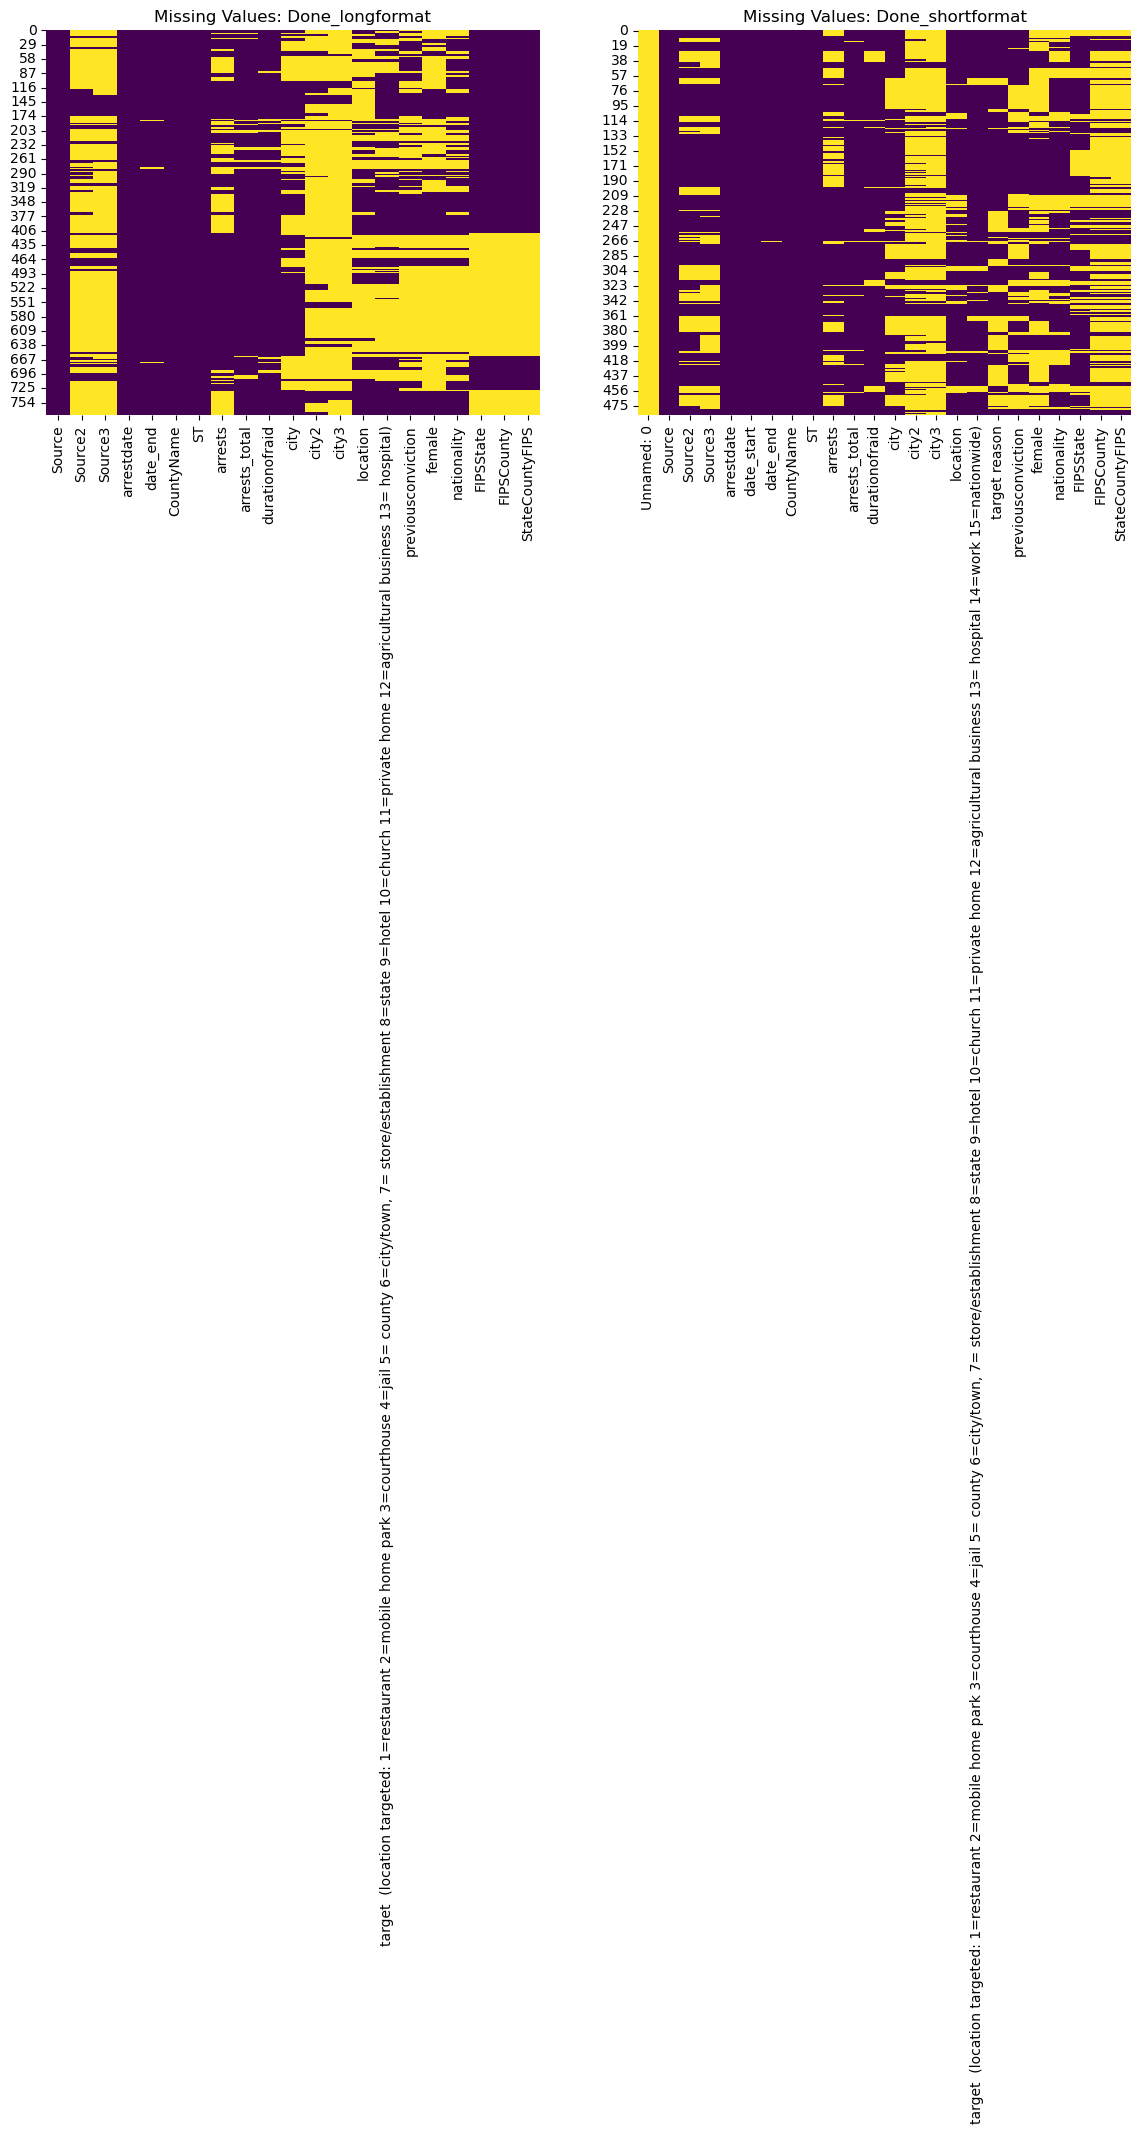

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

missing_long = df_long.isnull().sum()
missing_short = df_short.isnull().sum()

long_descriptive_stats = df_long.describe()

plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
sns.heatmap(df_long.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values: Done_longformat")

plt.subplot(1, 2, 2)
sns.heatmap(df_short.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values: Done_shortformat")

plt.tight_layout()
plt.show()

# (missing_long, long_descriptive_stats)

## Statistical Analysis

In [31]:
(missing_long, long_descriptive_stats)

(Source                                                                                                                                                                                                              0
 Source2                                                                                                                                                                                                           589
 Source3                                                                                                                                                                                                           637
 arrestdate                                                                                                                                                                                                          0
 date_end                                                                                                                                   

## Conclusion for Missing Field

The dataset NEED explanation from prior team, otherwise it will impact greatly on further analysis. Needs a lot of data preperation.

1. Missing Values:
  * The heatmaps show a significant number of missing values in both sheets, particularly in fields like Source2, Source3, city2, city3, location, and female.
  * In the Done_longformat sheet, key columns like arrests, durationofraid, location, and previousconviction have substantial missing data:
arrests: 248 missing values out of 780.
city and related columns (city2, city3): More than half of the entries are missing.
location: Missing in 406 rows.
female: Missing in 501 rows.
2. Basic Statistics (Done_longformat):
  * arrests: The average number of arrests per raid is around 30, with a large standard deviation (±50), indicating high variability.
  * durationofraid: The average duration of raids is 25 days, with a range extending up to 235 days.
  * arrests_total: Highly variable, with a maximum of 2059 arrests in a single event.


# Data Preperation

## Converting Date Time

In [49]:
# Convert the 'arrestdate' column to datetime format for easier time series analysis
df_short['arrestdate'] = pd.to_datetime(df_short['arrestdate'], errors='coerce')
df_short = df_short.drop(columns=['Unnamed: 0'])

## Correcting the Links Embedded

In [55]:
from openpyxl import load_workbook

# Load the workbook using openpyxl
wb = load_workbook(file_path)

# Select the first sheet
sheet = wb['Done_shortformat']

# Dictionary to hold link data
link_data = {"Source": [], "Source2": [], "Source3": []}

# Loop through the first few rows to extract hyperlinks from the "Source", "Source2", and "Source3" columns
for row in sheet.iter_rows(min_row=2, max_row=sheet.max_row, min_col=2, max_col=4):
    for idx, cell in enumerate(row):
        # Check if the cell has a hyperlink
        link_data[f"Source{'' if idx == 0 else idx + 1}"].append(cell.hyperlink.target if cell.hyperlink else None)

# Convert to a DataFrame
link_df = pd.DataFrame(link_data)

# Display the links extracted
link_df.head()

,Source,Source2,Source3
0,https://www.ice.gov/features/no-safe-haven-2019,https://www.ice.gov/news/releases/ice-new-york...,https://www.ice.gov/news/releases/ice-arrests-...
1,https://www.ice.gov/features/no-safe-haven-2019,https://www.ice.gov/news/releases/ice-new-york...,https://www.ice.gov/news/releases/ice-arrests-...
2,https://www.ice.gov/features/no-safe-haven-2019,https://www.ice.gov/news/releases/ice-new-york...,https://www.ice.gov/news/releases/ice-arrests-...
3,https://www.ice.gov/features/no-safe-haven-2019,https://www.ice.gov/news/releases/ice-new-york...,https://www.ice.gov/news/releases/ice-arrests-...
4,https://www.ice.gov/features/no-safe-haven-2019,https://www.ice.gov/news/releases/ice-new-york...,https://www.ice.gov/news/releases/ice-arrests-...


## Merging Link DF and Short DF

In [58]:
# Integrate the extracted links into the 'Done_shortformat' dataframe
df_short['Source_Link'] = link_df['Source']
df_short['Source2_Link'] = link_df['Source2']
df_short['Source3_Link'] = link_df['Source3']

In [63]:
df_short.columns

Index(['Source', 'Source2', 'Source3', 'arrestdate', 'date_start', 'date_end',
       'CountyName', 'ST', 'arrests', 'arrests_total', 'durationofraid',
       'city', 'city2', 'city3', 'location',
       'target  (location targeted: 1=restaurant 2=mobile home park 3=courthouse 4=jail 5= county 6=city/town, 7= store/establishment 8=state 9=hotel 10=church 11=private home 12=agricultural business 13= hospital 14=work 15=nationwide)',
       'target reason', 'previousconviction', 'female', 'nationality',
       'FIPSState', 'FIPSCounty', 'StateCountyFIPS', 'Source_Link',
       'Source2_Link', 'Source3_Link'],
      dtype='object')

In [65]:
df_short.head(1)

,Source,Source2,Source3,arrestdate,date_start,date_end,CountyName,ST,arrests,arrests_total,...,target reason,previousconviction,female,nationality,FIPSState,FIPSCounty,StateCountyFIPS,Source_Link,Source2_Link,Source3_Link
0,Link,Link,Link,2014-11-15,2014-11-15,2014-11-18,San Fransico,CA,NaN,50,...,"Operation No Safe Haven I, Human Rights Violat...",42.105263,NaN,NaN,NaN,NaN,NaN,https://www.ice.gov/features/no-safe-haven-2019,https://www.ice.gov/news/releases/ice-new-york...,https://www.ice.gov/news/releases/ice-arrests-...


## Manual Cleaning with Prompt Engineering

For df_short, there are actually duplicates from the dataset, WE NEED TO A LOT OF MANUAL CLEANINGS, do the following:
Using arrests_total and arrestdate as primary key to drop/merge duplicates, create an unique dataset with only these columns:

0. 'Source_Link',  'Source2_Link', 'Source3_Link' always kept and moved to front, , using only the first one you find, 'Source', 'Source2', 'Source3' dropped.
1. 'arrestdate' kept, primary key
2. 'date_start', 'date_end' kept, using only the first one you find
3. 'CountyName', 'ST', kept and merge into a list of strings, drop duplicates of this list.
4. 'arrests' dropped
5. 'arrests_total' kept, primary key
6. 'durationofraid' kept, using only the first one you find
7. 'city', 'city2', 'city3', 'location' dropped
8. target  (location targeted: 1=restaurant 2=mobile home park 3=courthouse 4=jail 5= county 6=city/town, 7= store/establishment 8=state 9=hotel 10=church 11=private home 12=agricultural business 13= hospital 14=work 15=nationwide) kept, and shortens the column name into `target`,  using only the first one you find, target reason kept, using only the first one you find
9. 'previousconviction' kept, using only the first one you find
10. 'female' kept, using only the first one you find
11.  'nationality', 'FIPSState', 'FIPSCounty', kept and merge into a list of strings, drop duplicates of this list.

In [121]:
# Update the column list to match the correct column name
columns_to_keep_corrected = [
    'Source_Link', 'Source2_Link', 'Source3_Link',  # Always keep these and move to front
    'arrestdate',  # Primary key
    'date_start', 'date_end',  # Keep these columns
    'CountyName', 'ST',  # To merge into a single list
    'arrests_total',  # Primary key
    'durationofraid',  # Keep this column
    'target',  # Correct column name
    'target reason',  # Keep this column
    'previousconviction',  # Keep this column
    'female',  # Keep this column
    'nationality', 'FIPSState', 'FIPSCounty'  # To merge into a single list
]

# Select only relevant columns
df_unique_corrected = df_short_cleaned[columns_to_keep_corrected]

# Step 3: Merge 'CountyName' and 'ST' into a list of strings and drop duplicates of this list
df_unique_corrected['CountyState_List'] = df_unique_corrected.apply(lambda x: list(set([str(x['CountyName']), str(x['ST'])])), axis=1)

# Step 4: Merge 'nationality', 'FIPSState', and 'FIPSCounty' into a list of strings and drop duplicates
df_unique_corrected['Nationality_FIPS_List'] = df_unique_corrected.apply(lambda x: list(set([str(x['nationality']), str(x['FIPSState']), str(x['FIPSCounty'])])), axis=1)

# Step 5: Drop intermediate columns used for merging
df_unique_corrected.drop(['CountyName', 'ST', 'nationality', 'FIPSState', 'FIPSCounty'], axis=1, inplace=True)

C:\Users\xieha\AppData\Local\Temp\ipykernel_45016\1461133833.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_corrected['CountyState_List'] = df_unique_corrected.apply(lambda x: list(set([str(x['CountyName']), str(x['ST'])])), axis=1)
C:\Users\xieha\AppData\Local\Temp\ipykernel_45016\1461133833.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_unique_corrected['Nationality_FIPS_List'] = df_unique_corrected.apply(lambda x: list(set([str(x['nationality']), str(x['FIPSState']), str(x['FIPSC

In [123]:
df_unique_corrected.head()

,Source_Link,Source2_Link,Source3_Link,arrestdate,date_start,date_end,arrests_total,durationofraid,target,target reason,previousconviction,female,CountyState_List,Nationality_FIPS_List
10,https://www.reuters.com/article/us-usa-fashion...,None,None,2014-10-09,2014-10-09,2014-10-09,9,1,7,Operation Fashion Police: money laundering for...,.,.,"[CA, Los Angeles]","[Mexico, Colombia, 6.0, 37.0]"
0,https://www.ice.gov/features/no-safe-haven-2019,https://www.ice.gov/news/releases/ice-new-york...,https://www.ice.gov/news/releases/ice-arrests-...,2014-11-15,2014-11-15,2014-11-18,50,5,15,"Operation No Safe Haven I, Human Rights Violat...",42.105263,NaN,"[CA, San Fransico]",[nan]
11,https://www.reuters.com/article/us-usa-materni...,None,None,2015-02-24,2015-02-24,2015-02-24,.,1,9,“maternity tourism” schemes,.,NaN,"[CA, Orange]","[6.0, nan]"
14,https://www.nola.com/news/suspect-wounded-duri...,None,None,2015-02-26,2015-02-26,2015-02-26,NaN,1,11,contraband — guns or illegal drugs,.,0,"[Orleans, LA]","[22.0, nan, 71.0]"
22,https://www.ice.gov/news/releases/2059-convict...,https://www.workingimmigrants.com/2017/02/ice-...,https://www.dhs.gov/news/2015/03/09/2059-crimi...,2015-03-01,2015-03-01,2015-03-05,2059,5,15,Operation Cross Check,NaN,NaN,"[MD, Baltimore]","[24.0, 5.0, 94 countries]"


In [125]:
df_unique_corrected.shape

(120, 14)

In [127]:
# Rename the dataframe
df_unique = df_unique_corrected

In [129]:
df_unique.to_csv('df_unique.csv', encoding='utf-8', index=False)

## Total Person Arrested by ICE Raids

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

repo_path = r'C:\Users\xieha\OneDrive/BU/DS 701/project/ds-padilla-immigrant-raids'
file_path_unique = repo_path + '/EDA/df_unique.csv'
df_unique = pd.read_csv(file_path_unique)

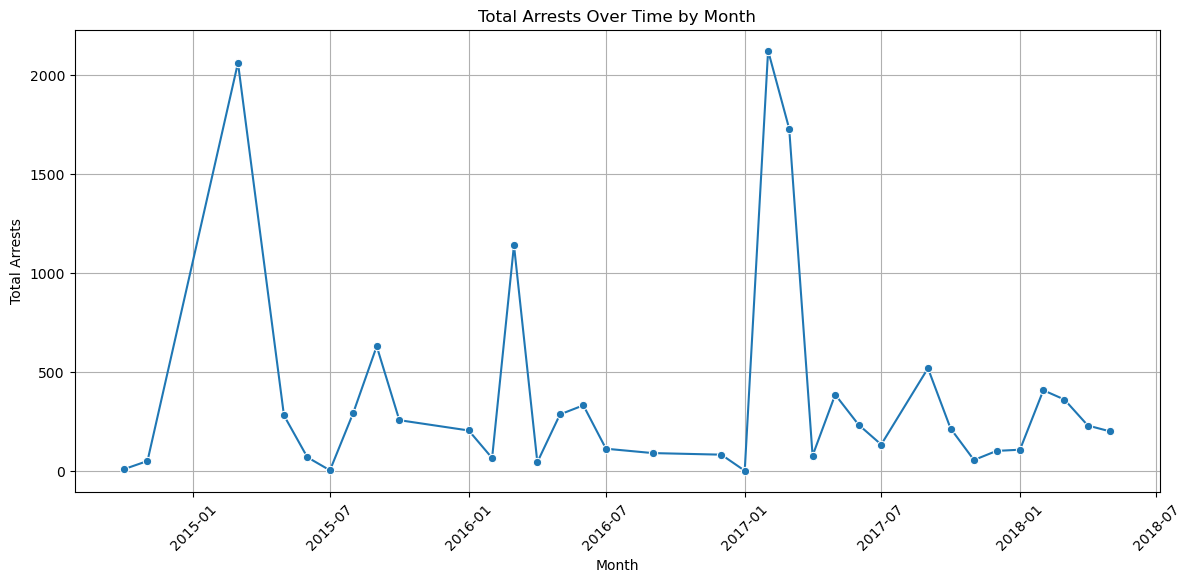

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Convert 'arrestdate' to datetime
df_unique['arrestdate'] = pd.to_datetime(df_unique['arrestdate'], errors='coerce')

# Step 2: Handle missing values and clean up 'arrests_total'
# Convert 'arrests_total' to numeric and drop rows with missing values
df_unique['arrests_total'] = pd.to_numeric(df_unique['arrests_total'], errors='coerce')
df_unique = df_unique.dropna(subset=['arrestdate', 'arrests_total'])

# Step 3: Group by month and aggregate arrests
df_unique['month_year'] = df_unique['arrestdate'].dt.to_period('M')
monthly_arrests = df_unique.groupby('month_year')['arrests_total'].sum().reset_index()

# Convert the 'month_year' period to datetime for plotting
monthly_arrests['month_year'] = monthly_arrests['month_year'].dt.to_timestamp()

# Step 4: Visualize using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_arrests, x='month_year', y='arrests_total', marker='o')
plt.title('Total Arrests Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Total Arrests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

A visualization of number of persons arrested through out time.

## Total Arrests by ICE Raids

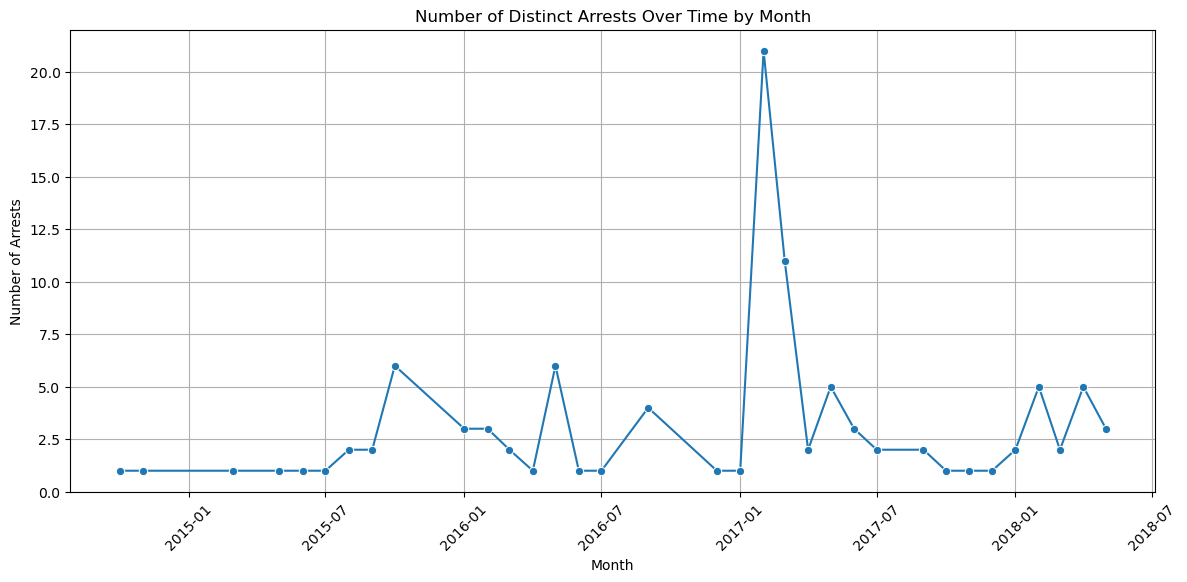

In [143]:
# Step 1: Group by month and count the number of arrests for each month
df_unique['month_year'] = df_unique['arrestdate'].dt.to_period('M')
monthly_arrest_count = df_unique['month_year'].value_counts().reset_index()
monthly_arrest_count.columns = ['month_year', 'arrest_count']

# Convert 'month_year' to a datetime format for proper plotting
monthly_arrest_count['month_year'] = monthly_arrest_count['month_year'].dt.to_timestamp()

# Step 2: Sort by month_year
monthly_arrest_count = monthly_arrest_count.sort_values('month_year')

# Step 3: Visualize using Seaborn
plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_arrest_count, x='month_year', y='arrest_count', marker='o')
plt.title('Number of Distinct Arrests Over Time by Month')
plt.xlabel('Month')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## Total Arrests by Nationalities

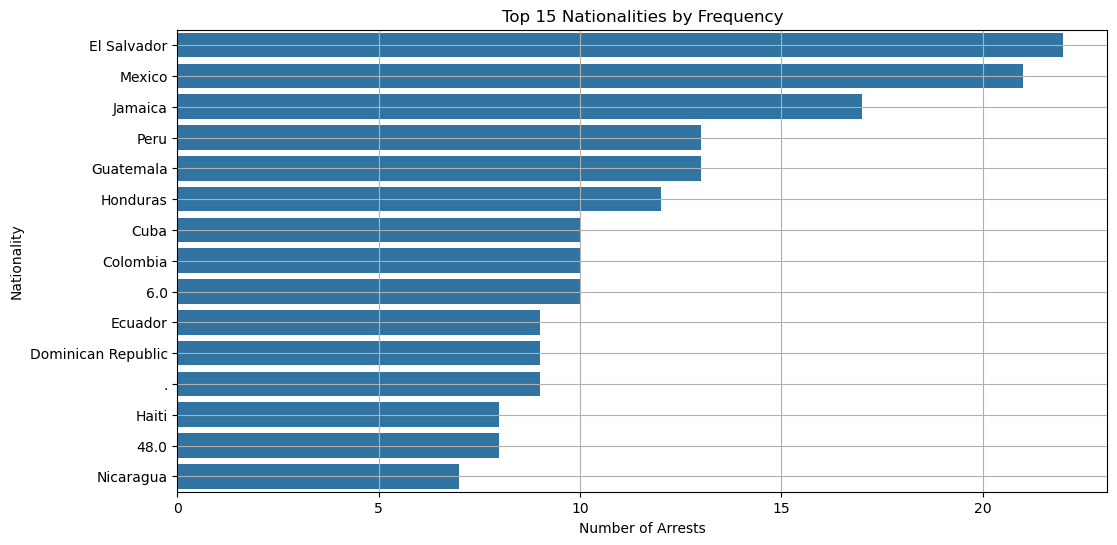

In [146]:
# Step 1: Extract and clean the 'Nationality_FIPS_List' column
df_unique['Nationality_FIPS_List'] = df_unique['Nationality_FIPS_List'].str.strip("[]").str.replace("'", "").str.split(',')

# Step 2: Create a list to store all nationalities
nationalities = df_unique['Nationality_FIPS_List'].dropna().explode().str.strip()

# Step 3: Count the frequency of each nationality
nationality_counts = nationalities.value_counts().reset_index()
nationality_counts.columns = ['Nationality', 'Count']

# Step 4: Filter out empty or invalid entries
nationality_counts = nationality_counts[nationality_counts['Nationality'].str.lower() != 'nan']

# Step 5: Visualize the top 15 nationalities using a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Count', y='Nationality', data=nationality_counts.head(15))
plt.title('Top 15 Nationalities by Frequency')
plt.xlabel('Number of Arrests')
plt.ylabel('Nationality')
plt.grid(True)
plt.show()
